# 분류용 가상 데이터 생성 방법

Scikit-Learn 패키지는 분류(classification) 모형의 테스트를 위해 `make_classification` 와 `make_blob` 라는 가상 데이터 생성 함수를 제공한다.

`make_classification` 함수의 인수와 반환값은 다음과 같다.

```
X, y = make_classification(n_samples=100, n_features=20, n_informative=2, n_redundant=2, 
                           n_repeated=0, n_classes=2, n_clusters_per_class=2,      
                           weights=None, flip_y=0.01, class_sep=1.0, hypercube=True, 
                           shift=0.0, scale=1.0, shuffle=True, random_state=None)
```

* 인수:	
 * n_samples : 정수. 디폴트 100
    * 표본 데이터의 수
 * n_features : 정수. 디폴트 20
    * 독립 변수의 수
 * n_informative : 정수. 디폴트 2
    * 독립 변수 중 서로 독립인 성분의 수
 * n_redundant : 정수. 디폴트 2
    * 독립 변수 중 종속 성분의 수
 * n_repeated : 정수. 디폴트 0
    * 독립 변수 중 단순 중복된 성분의 수
 * n_classes : 정수. 디폴트 2
    * 종속 변수의 클래스 수
 * n_clusters_per_class : 정수. 디폴트 2
    * 클래스 당 클러스터의 수
 * weights : 리스트. 디폴트 None
    * 각 클래스에 할당된 표본 수
 * random_state : 정수. 디폴트 None
    * 난수 발생 시드
    
* 반환값:	
 * X : [n_samples, n_features] 크기의 배열 
    * 독립 변수
 * y : [n_samples] 크기의 배열 
    * 종속 변수


In [1]:

##스타트업 파일

from scipy.stats import norm
import numpy as np
import scipy as sp
from pandas.core import datetools 
import pandas as pd
import statsmodels.api as sm ## R 패키지에서 불러온것, 샘플데이터 옮겨쓸수 있는 프로젝트 있음. 회귀분석에 유용 
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import sklearn as sk 
## 전처리 

import matplotlib as mpl
mpl.use('Agg')
import matplotlib.pylab 
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns
sns.set()
sns.set_style("whitegrid")
sns.set_color_codes()

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  import sys


In [2]:
from sklearn.datasets import make_classification

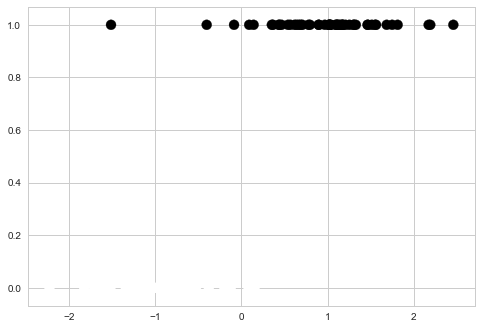

In [3]:
X, y = make_classification(n_features=1, n_redundant=0, n_informative=1, n_clusters_per_class=1, random_state=4)
plt.scatter(X, y, marker='o', c=y, s=100)
plt.show()

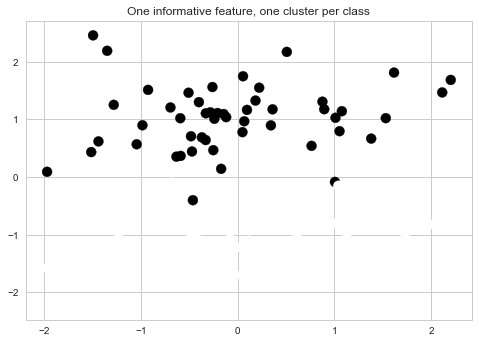

In [4]:
plt.title("One informative feature, one cluster per class")
X, y = make_classification(n_features=2, n_redundant=0, n_informative=1, n_clusters_per_class=1, random_state=4)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=100)
plt.show() ## X 에따라 데이터가 바뀌지만 Y에서는 영향을 많이 받지 않는다 

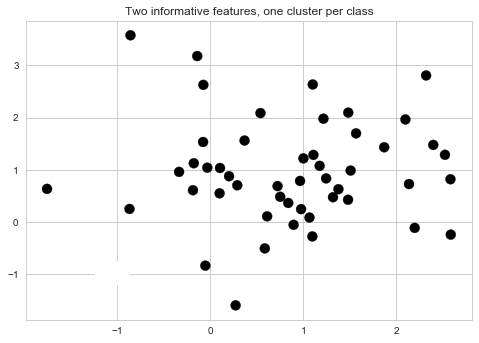

In [5]:
plt.title("Two informative features, one cluster per class")
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1, random_state=6)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=100)
plt.show()

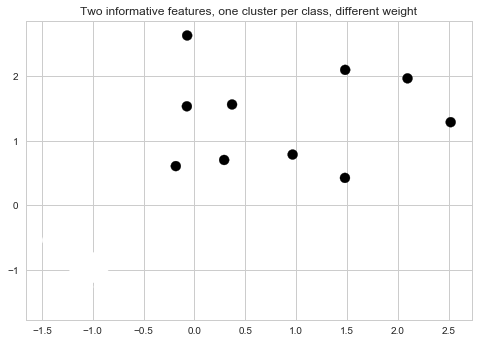

In [8]:
plt.title("Two informative features, one cluster per class, different weight") ##r가중치를 다르게 둠, 클래스마다 데이터의 숫자가 다름 
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1, weights=[0.9, 0.1], random_state=6)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=100)
plt.show()

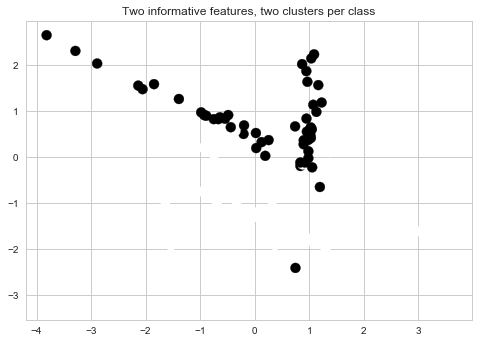

In [10]:
plt.title("Two informative features, two clusters per class") ## 클래스에 두개의 클러스터링이 있음 두군집이 있어서 그래프에는 두개의 군집이 나타남
X2, Y2 = make_classification(n_features=2, n_redundant=0, n_informative=2, random_state=2)
plt.scatter(X2[:, 0], X2[:, 1], marker='o', c=Y2, s=100)
plt.show()

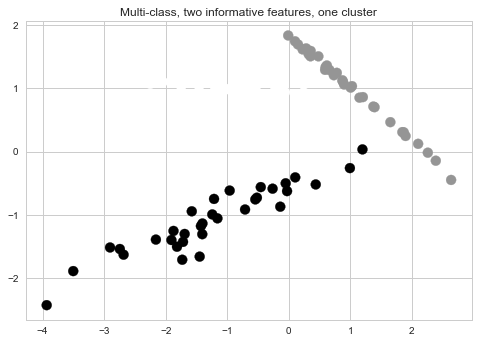

In [11]:
plt.title("Multi-class, two informative features, one cluster")
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1, n_classes=3)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=100)
plt.show()

`make_blobs` 함수의 인수와 반환값은 다음과 같다.

```
X, y = make_blobs(n_samples=100, n_features=2, centers=3, 
                  cluster_std=1.0, center_box=(-10.0, 10.0), 
                  shuffle=True, random_state=None)
```
   
* 인수:	
 * n_samples : 정수. 디폴트 100
    * 표본 데이터의 수
 * n_features : 정수. 디폴트 20
    * 독립 변수의 수
 * centers : 정수 또는 [n_centers, n_features] 크기의 배열. 디폴트 3
   * 생성할 클러스터의 수 혹은 중심
 * cluster_std: 실수 혹은 실수열. 디폴트 1.0
   * 클러스터의 표준 편차
 * center_box: 실수 쌍, 디폴트 (-10.0, 10.0)) 
   * 생성할 클러스터의 바운딩 박스(bounding box)
    
* 반환값:	
 * X : [n_samples, n_features] 크기의 배열 
    * 독립 변수
 * y : [n_samples] 크기의 배열 
    * 종속 변수


In [12]:
from sklearn.datasets import make_blobs

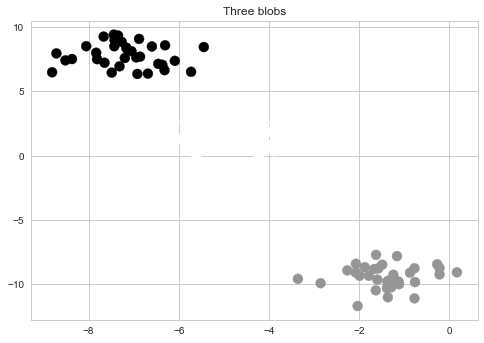

In [13]:
plt.title("Three blobs")
X1, Y1 = make_blobs(n_features=2, centers=3)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1, s=100)
plt.show()